In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# membaca file csv menggunakan pandas
path = '/content/drive/MyDrive/Raktikum_ML/Praktikum05/'
df = pd.read_csv(path + '/Data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Cek missing value
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [6]:
# Cek duplicate
df.duplicated().sum()

np.int64(0)

In [7]:
# Menghapus data duplikat
df = df.drop_duplicates()

# Cek duplicate ulang setelah menghapus
df.duplicated().sum()

np.int64(0)

In [24]:
df = df.rename(columns={
    'SepalLengthCm': 'sepal_length_cm',
    'SepalWidthCm' : 'sepal_width_cm',
    'PetalLengthCm': 'petal_length_cm',
    'PetalWidthCm' : 'petal_width_cm',
    'Species'       : 'species'
})


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               150 non-null    int64  
 1   sepal_length_cm  150 non-null    float64
 2   sepal_width_cm   150 non-null    float64
 3   petal_length_cm  150 non-null    float64
 4   petal_width_cm   150 non-null    float64
 5   species          150 non-null    int8   
dtypes: float64(4), int64(1), int8(1)
memory usage: 6.1 KB


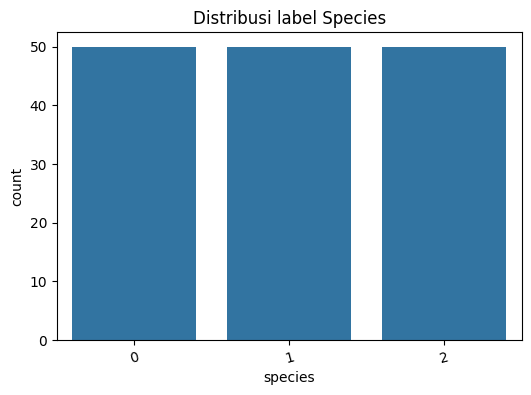

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x='species', data=df)
plt.title('Distribusi label Species')
plt.xticks(rotation=15)
plt.show()

In [23]:
# mapping label -> kode untuk target
species_cat = df['species'].astype('category')
species_classes = list(species_cat.cat.categories)
df['species'] = species_cat.cat.codes

df.head()

,Id,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


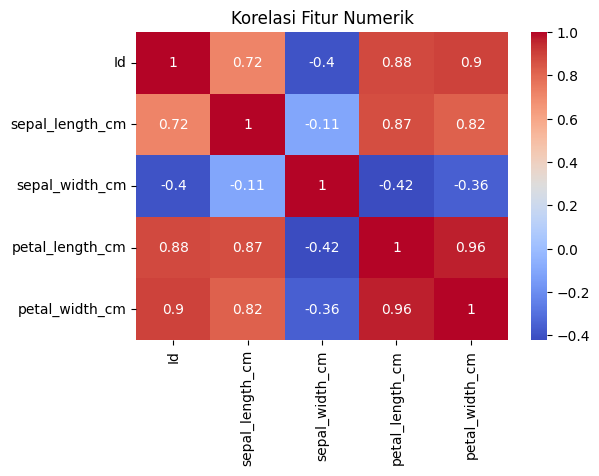

In [21]:
# Asumsikan df sudah bersih dan kolom numerik tersedia
plt.figure(figsize=(6,4))
sns.heatmap(df.drop(columns=['species']).corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur Numerik')
plt.show()

In [28]:
# Memilih fitur dan target

feature_cols = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']
X = df[feature_cols]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% untuk testing → sisanya 80% untuk training
    random_state=42,
    stratify=y           # menjaga proporsi setiap kelas tetap seimbang
)

print(len(X_train), len(X_test))


120 30


In [29]:
# membangun model
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [33]:
# Evaluasi

y_pred = dt.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test,
    y_pred,
    target_names=[str(name) for name in species_classes]  # convert target names to strings
))

Akurasi: 93.33 %

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



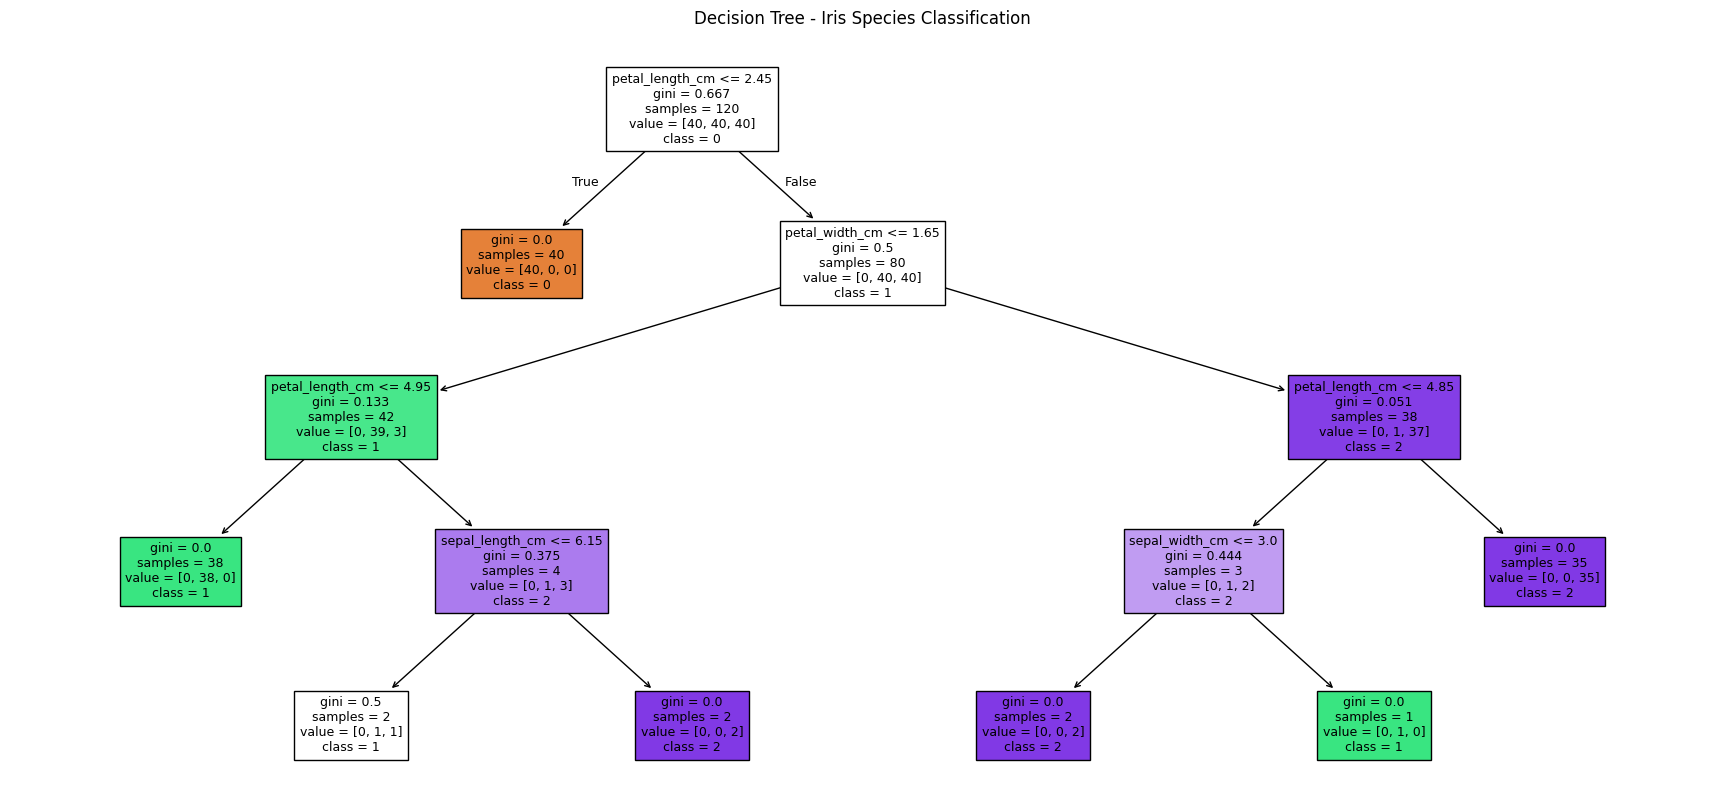

In [35]:
# Visualisasi model
plt.figure(figsize=(22,10))
plot_tree(
    dt,
    feature_names=feature_cols,
    class_names=[str(name) for name in species_classes], # use the correct variable and convert to strings
    filled=True,
    fontsize=9
)
plt.title("Decision Tree - Iris Species Classification") # update the title
plt.show()

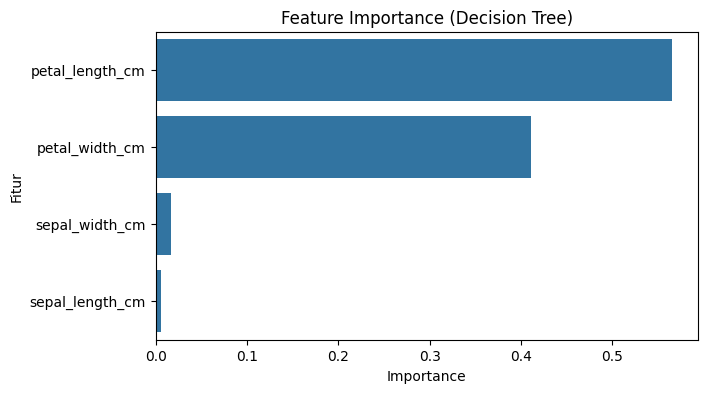

petal_length_cm    0.565639
petal_width_cm     0.411154
sepal_width_cm     0.016878
sepal_length_cm    0.006329
dtype: float64


In [36]:
# Fitur yang penting
imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.show()

print(imp)


In [37]:
scores = {}
for d in range(2, 10):  # mencoba depth dari 2 hingga 9
    m = DecisionTreeClassifier(max_depth=d, random_state=42)
    m.fit(X_train, y_train)
    scores[d] = accuracy_score(y_test, m.predict(X_test))

best_d = max(scores, key=scores.get)
print("Best max_depth:", best_d, "| Acc:", round(scores[best_d]*100, 2), "%")


Best max_depth: 3 | Acc: 96.67 %
